Nama : Erin Nur Fatimah

ID : M515Y1092

Alamat : Sindet RT 003, Wukirsari, Imogiri, Bantul, Yogyakarta


# Data Loading

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Mengimport Library yang Dibutuhkan

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

### Melihat isi dataset
Melihat isi dataset menggunakan Pandas beserta melihat isi df.info() 

In [4]:
ds = pd.read_csv('/content/drive/MyDrive/milknew.csv')
ds

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


Output kode di atas memberikan informasi sebagai berikut :

* Ada 1059 baris baris (records atau jumlah pengamatan) dalam dataset.
* Terdapat 8 kolom yaitu: pH, Temperature, Taste, Odor, Fat, Turbidity, Colour, Grade 

# Deskripsi Variabel

### Membuat kolom type pada dataset

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


bisa dilihat ada 8 kolom yaitu 

* pH
* Temperature 
* Taste 
* Odor
* Fat 
* Turbidity 
* Colour
* Grade 


### Mengecek deskripsi statistik data

In [6]:
ds.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom. Pada tabel di atas memperlihatkan bahwa fitur pH, Temprature, dan Colour. dikelompokkan ke dalam fitur numerical. Sedangkan untuk fitur lainnya dikelompokkan ke dalam fitur kategori karena hanya terdiri dari 0 dan 1.

# Menangani Missing Value

### Menghitung jumlah data kosong pada setiap kolom

In [7]:
ds.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

dapat kita lihat bahwa tidak terdapat data kosong

### Memuat ukuran shape pada dataframe

In [8]:
ds.shape

(1059, 8)

### Mengklasifikasikan fitur categorical, numerical, dan target

In [9]:
# Mengklasifikasikan fitur categorical
cat_features = ['Taste','Odor','Fat','Turbidity']

# Mengklasifikasikan fitur numerical
num_features = ['pH','Temprature','Colour']

# Mengklasifikasikan fitur yang menjadi target
target_features = 'Grade'

# Menangani Outlier

Text(0.5, 0.98, 'Distribusi Outliers')

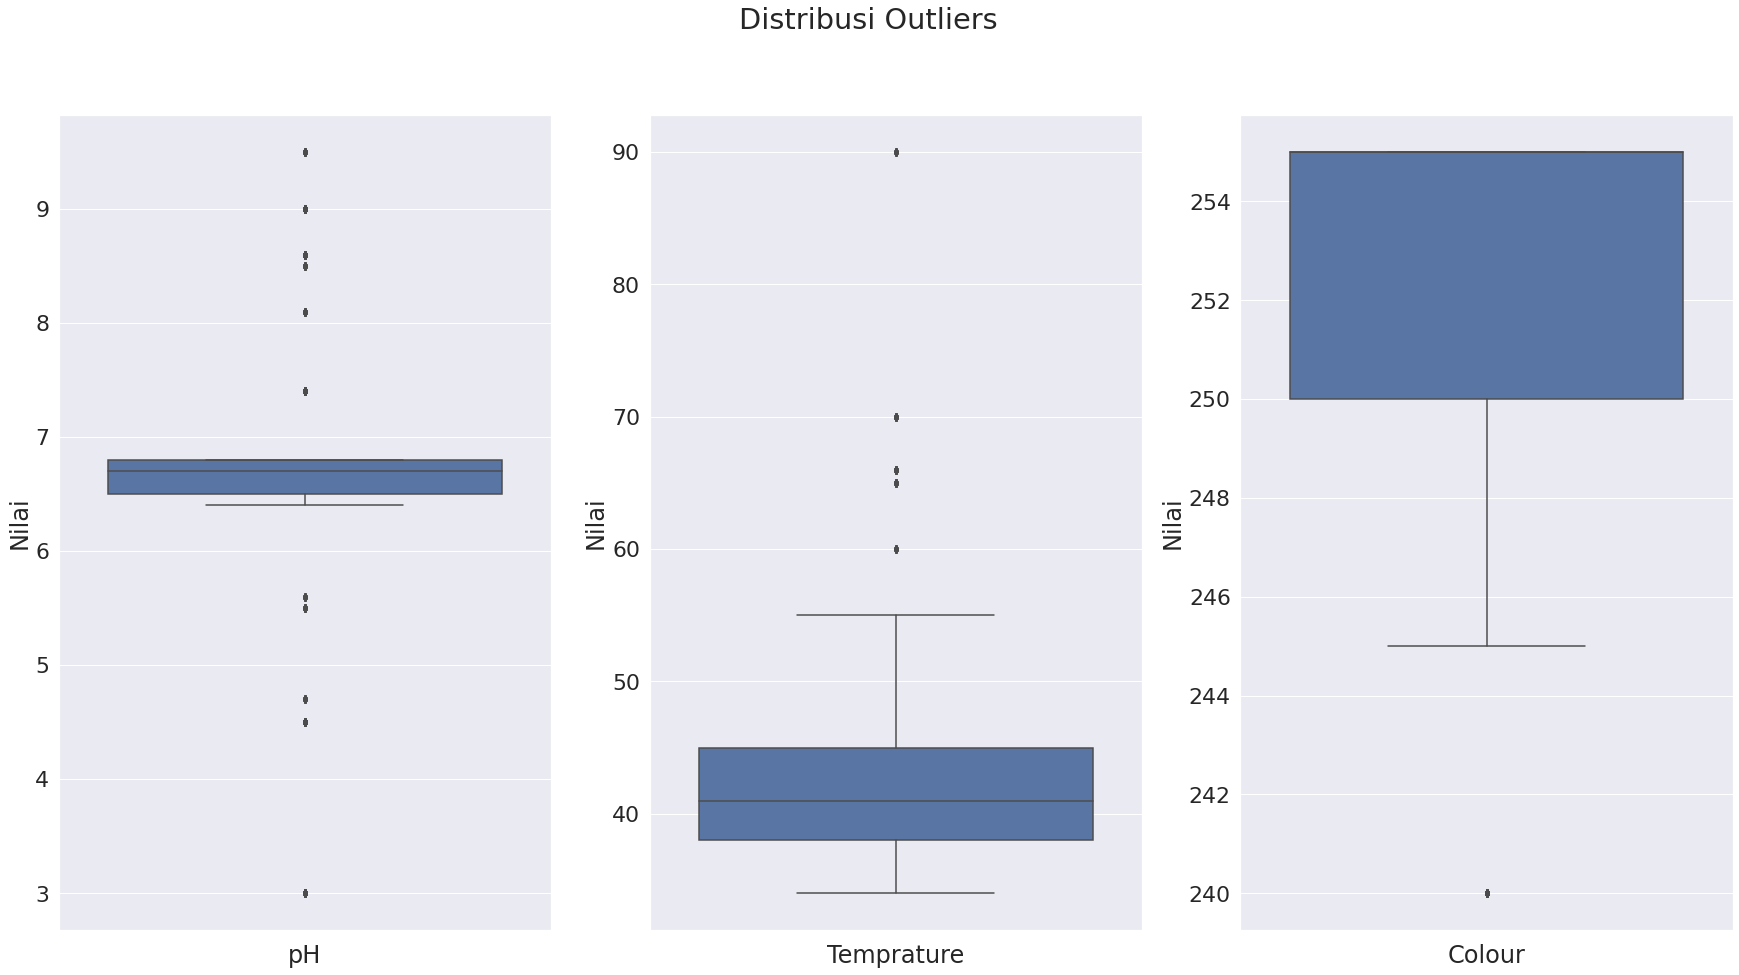

In [10]:
sns.set(font_scale=2)
fig, axes = plt.subplots(
    nrows=1,
    ncols=len(num_features),
    figsize=(30,15)
)
for indeks in range(len(num_features)):
    # Menggunakan boxplot untuk visualisasi nilai data pada fitur numerical
    ax = sns.boxplot(
        y=ds[num_features[indeks]],
        ax=axes[indeks]
    )
    axes[indeks].set_xlabel(num_features[indeks])
    axes[indeks].set_ylabel('Nilai')

fig.suptitle('Distribusi Outliers')

In [11]:
Q1 = ds.quantile(0.25)
Q3 = ds.quantile(0.75)
IQR = Q3-Q1
ds = ds[~( (ds<(Q1-1.5*IQR)) | (ds>(Q3+1.5*IQR)) ).any(axis=1)]

# Mengecek ukuran dataset setelah kita drop outliers
ds.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


(648, 8)

# Univariate Analysis

In [12]:
# Membagi fitur dataset menjadi fitur categorical, numerical, dan target
cat_features = ['Taste','Odor','Fat','Turbidity']
num_features = ['pH','Temprature','Colour']
target_features = 'Grade'

# Multivariate Analysis

### Encoding Fitur Target

In [ ]:
ds['Grade'].replace({
    'low':0,
    'medium':1,
    'high':2
}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


### Membuat plot untuk menampilkan grafik beberapa fitur

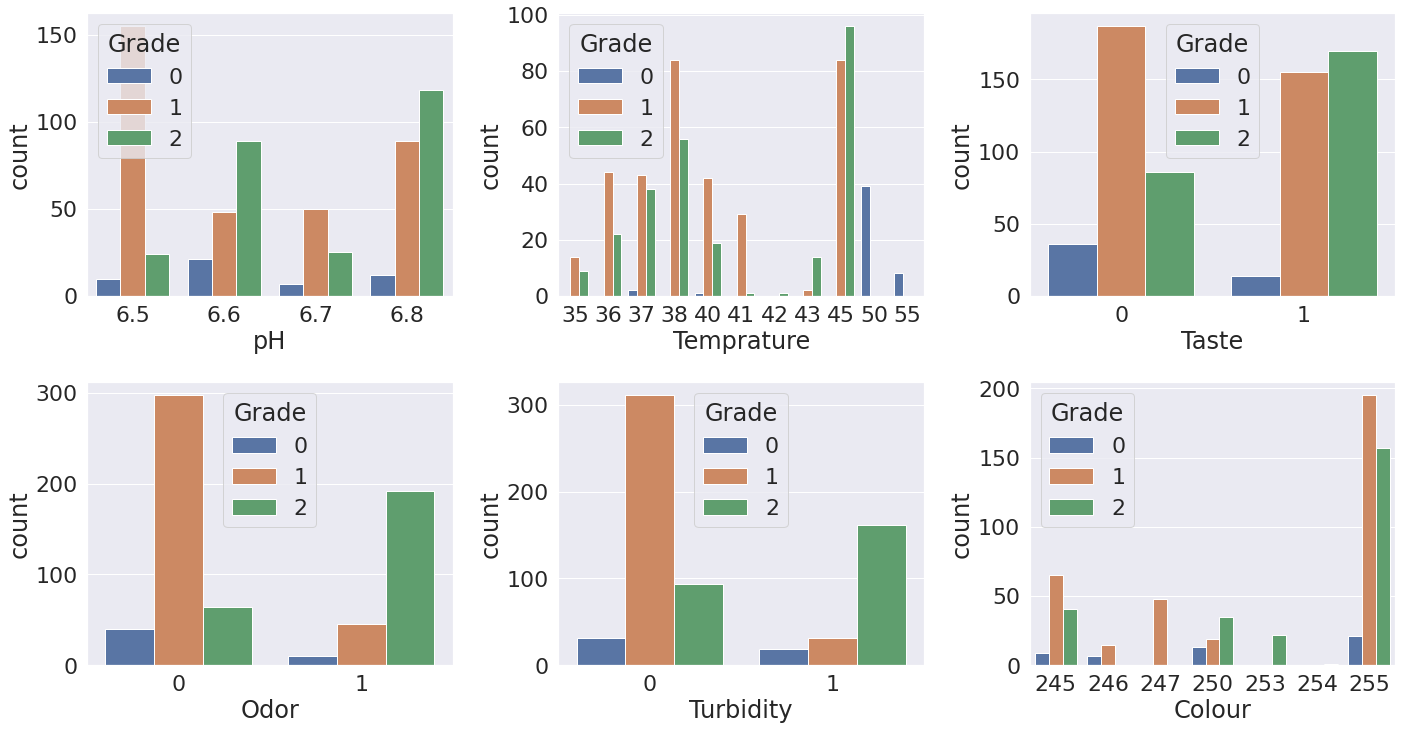

In [ ]:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(x='pH', hue='Grade', data=ds)
plt.subplot(3,3,2)
sns.countplot(x='Temprature', hue='Grade', data=ds)
plt.subplot(3,3,3)
sns.countplot(x='Taste', hue='Grade', data=ds)

plt.subplot(3,3,4)
sns.countplot(x='Odor', hue='Grade', data=ds)
plt.subplot(3,3,5)
sns.countplot(x='Turbidity', hue='Grade', data=ds)
plt.subplot(3,3,6)
sns.countplot(x='Colour', hue='Grade', data=ds)

plt.tight_layout()
plt.show()

Bisa kita lihat pada beberapa variable plot diatas bahwa kualitas medium atau kelas menengah cukup tinggi dibandingkan dengan yang kualitas low ataupun yang hight.

### Melihat histogram masing-masing fitur

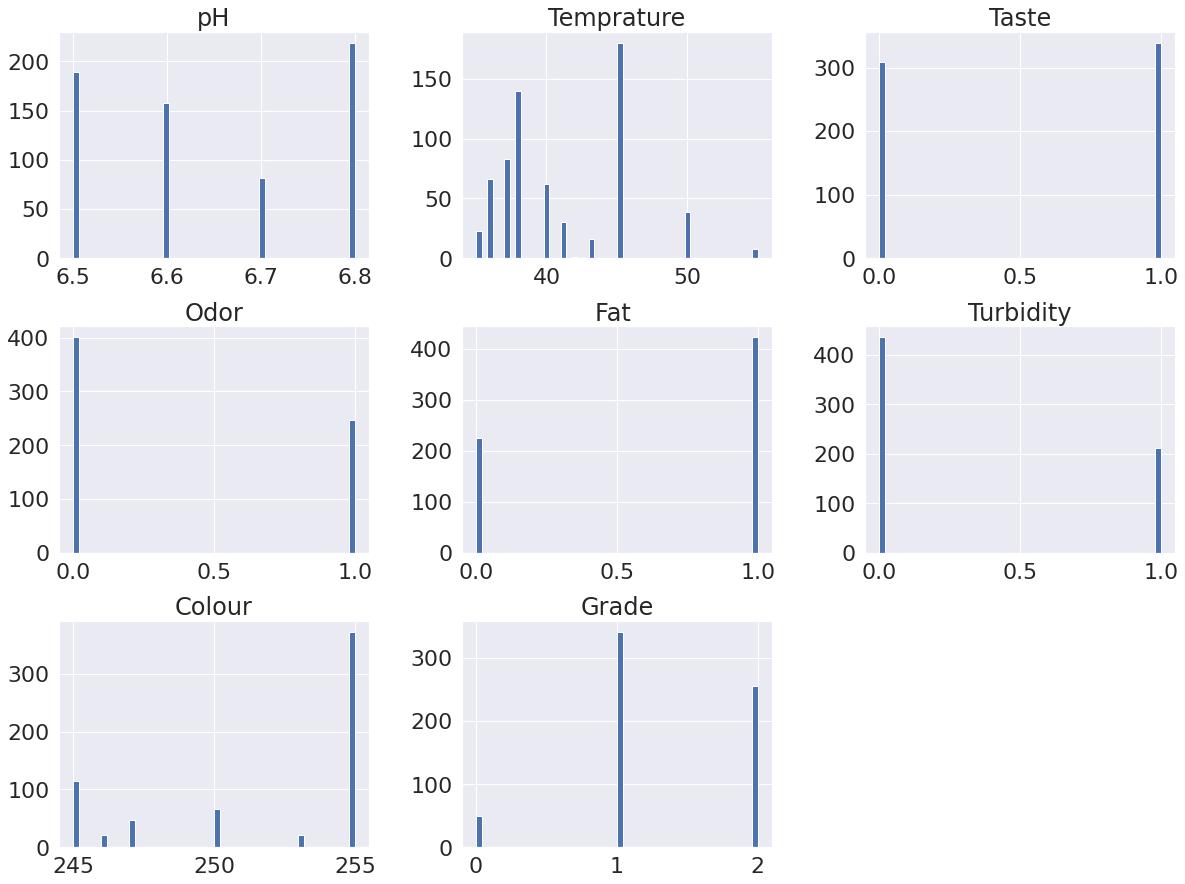

In [ ]:
ds.hist(bins=50, figsize=(20,15))
plt.show()

### Mengamati hubungan  antar fitur numerik dengan fungsi pairplot()

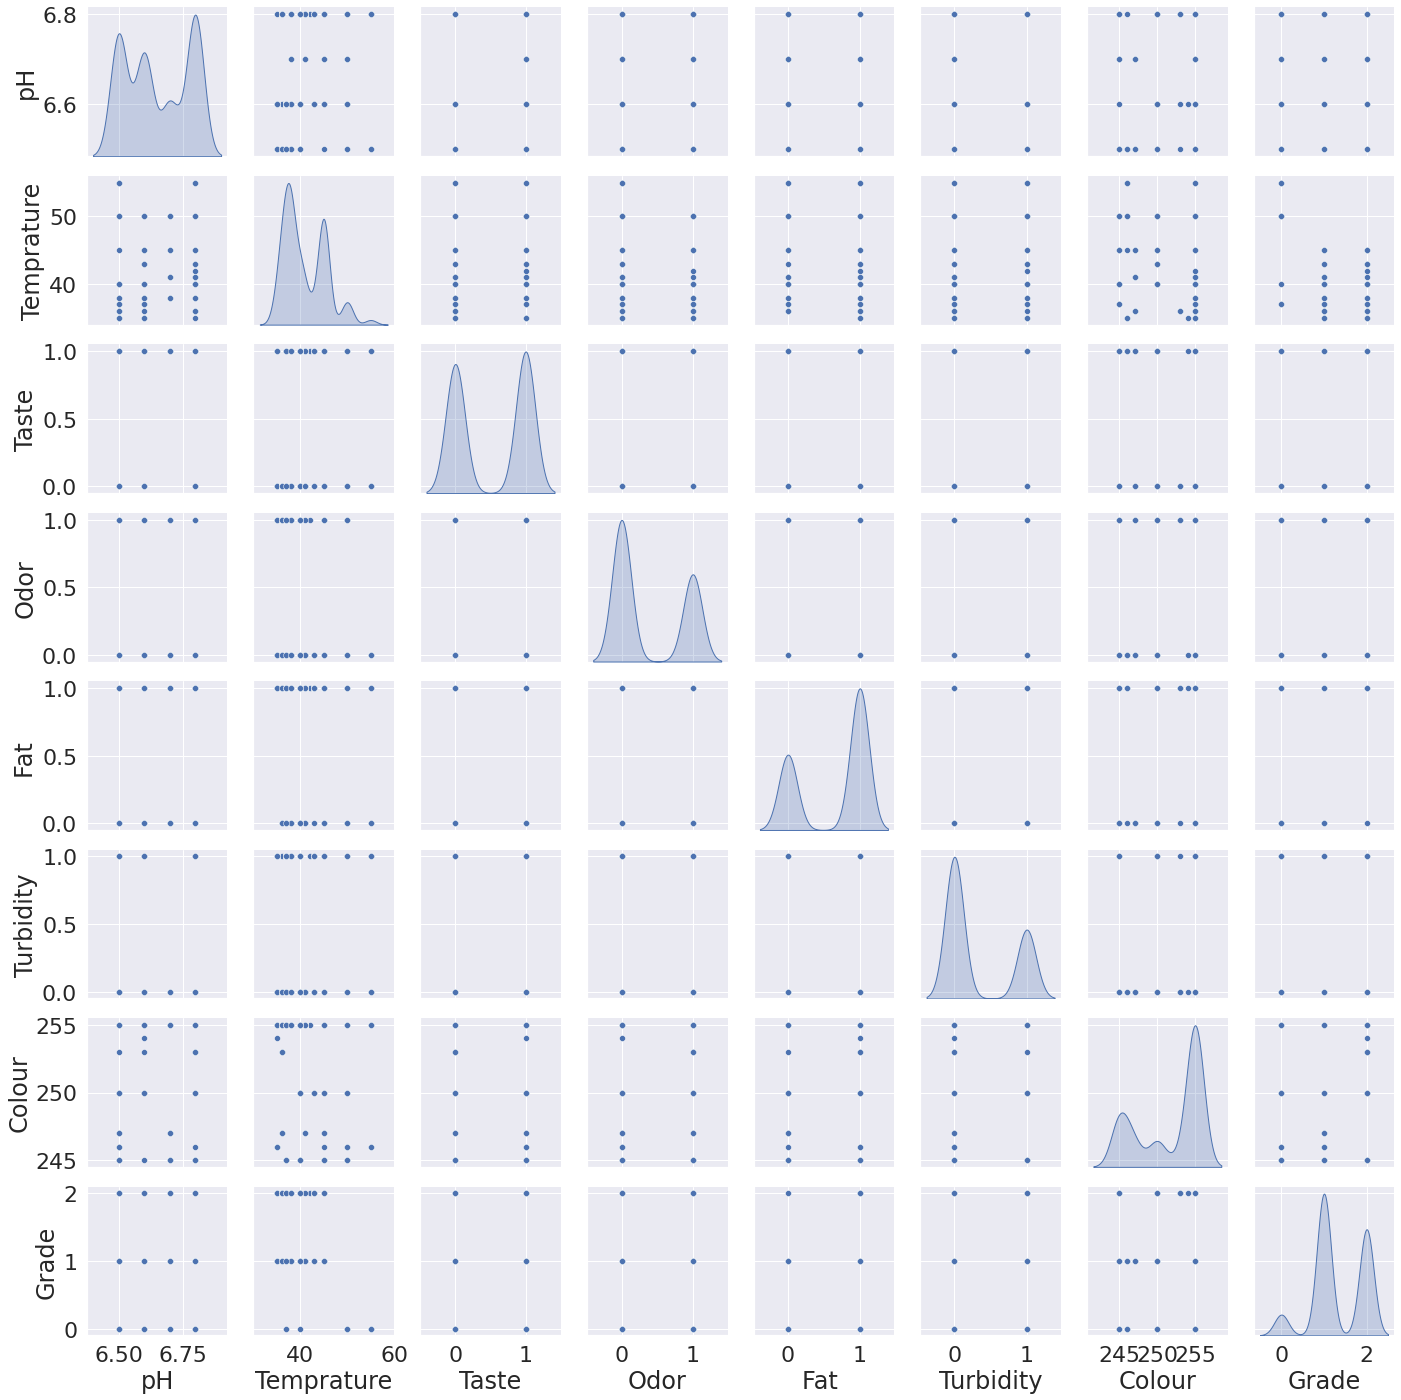

In [ ]:
# Mengamati hubungan  antar fitur numerik dengan fungsi pairplot()
sns.pairplot(ds, diag_kind='kde')

### Melakukan cek pada Multivariate EDA dengan heatmap

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

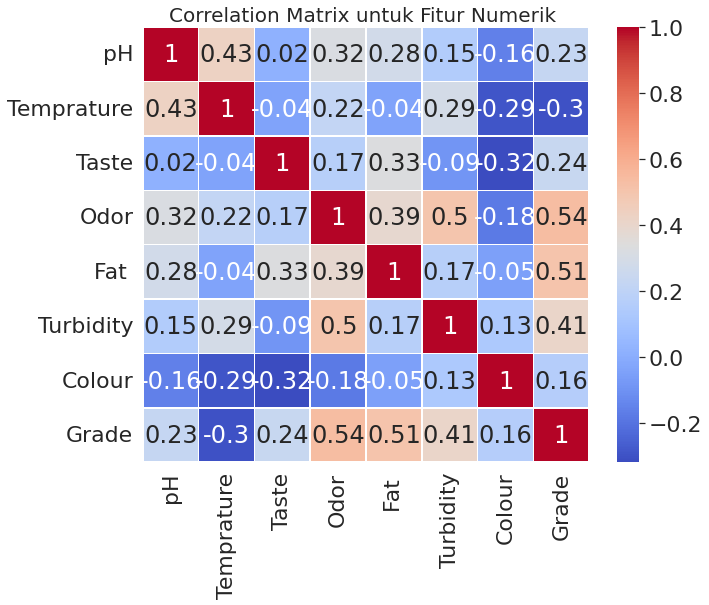

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = ds.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak menggunakan parameter anot=True
mask = np.zeros_like(correlation_matrix)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

## Melakukan pembagian dataset dengan train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

P = ds.iloc[:, :ds.columns.get_loc(target_features)]
Q = ds[target_features]
# Menggunakan proporsi pembagian sebesar 80:20
P_train, P_val, Q_train, Q_val = train_test_split(P, Q, test_size=0.2)

## Melakukan Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
P_train[num_features] = scaler.fit_transform(P_train[num_features])

# Modeling

## 1. Model Development dengan Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

mod1 = GradientBoostingClassifier(random_state=123)
prm1 = {
    'classifier__n_estimators':[10,50,100,250],
    'classifier__max_depth':[5,10,20],
    'classifier':[mod1]
}

## 2. Model Development dengan Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

mod2 = DecisionTreeClassifier(random_state=123)
prm2 = {
    'classifier__max_depth':[5,10,25],
    'classifier__min_samples_split':[2,5,10],
    'classifier':[mod2]
}

## 3. Model Development dengan K-Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

mod3 = KNeighborsClassifier()
prm3 = {
    'classifier__n_neighbors':[2,5,10,25,50,100],
    'classifier':[mod3]
}

## 4. Model Development dengan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

mod4 = RandomForestClassifier(random_state=123)
prm4 = {
    'classifier__n_estimators':[10,50,100,250],
    'classifier__max_depth':[5,10,20],
    'classifier':[mod4]
}

## Membuat pipeline dan melakukan training pada model dan hyperparameter tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([('classifier', mod1)])
params = [prm1, prm2, prm3, prm4]
gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='accuracy').fit(P_train, Q_train)

In [ ]:
gs_results = pd.DataFrame(gs.cv_results_)[[
    'param_classifier',
    'params',
    'mean_test_score',
    'rank_test_score'
]].sort_values(by='rank_test_score')

gs_results.head(5)

,param_classifier,params,mean_test_score,rank_test_score
3,"GradientBoostingClassifier(max_depth=5, n_esti...",{'classifier': GradientBoostingClassifier(max_...,0.997576,1
38,RandomForestClassifier(random_state=123),{'classifier': RandomForestClassifier(random_s...,0.996364,2
29,RandomForestClassifier(random_state=123),{'classifier': RandomForestClassifier(random_s...,0.996364,2
33,RandomForestClassifier(random_state=123),{'classifier': RandomForestClassifier(random_s...,0.996364,2
10,"GradientBoostingClassifier(max_depth=5, n_esti...",{'classifier': GradientBoostingClassifier(max_...,0.996364,2


# Evaluasi Model

## Skor akurasi pada data validasi dari model terbaik

In [ ]:
from sklearn.metrics import *

print(gs.best_params_)
print(gs.best_score_)
P_val[num_features] = scaler.transform(P_val[num_features])
print("Validation Score:",gs.score(P_val, Q_val))

{'classifier': GradientBoostingClassifier(max_depth=10, n_estimators=250, random_state=123), 'classifier__max_depth': 10, 'classifier__n_estimators': 250}
0.9942196531791908
Validation Score: 0.9923076923076923


In [ ]:
def vis_eval(Q_val, val_pred):
    """
    Visualisasi performa model dengan metrik evaluasi
    - y_val ialah kumpulan nilai aktual dari fitur target pada data validasi (pd.DataFrame)
    - val_pred ialah kumpulan nilai prediksi dari fitur target pada data validasi (pd.DataFrame)
    """

    print('Classification Report')
    print(classification_report(Q_val, val_pred))
    print('Confusion Matrix')
    cm=confusion_matrix(Q_val, val_pred)
    cm=pd.DataFrame(cm)
    plt.figure(figsize=(10,10))
    sns.heatmap(cm,
            cmap= "coolwarm",
            annot=True,
            fmt='',
            xticklabels=['Low', 'Medium', 'Hight'],
            yticklabels=['Low', 'Medium', 'Hight'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       1.00      1.00      1.00        68
           2       0.98      1.00      0.99        49

    accuracy                           0.99       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.99      0.99      0.99       130

Confusion Matrix


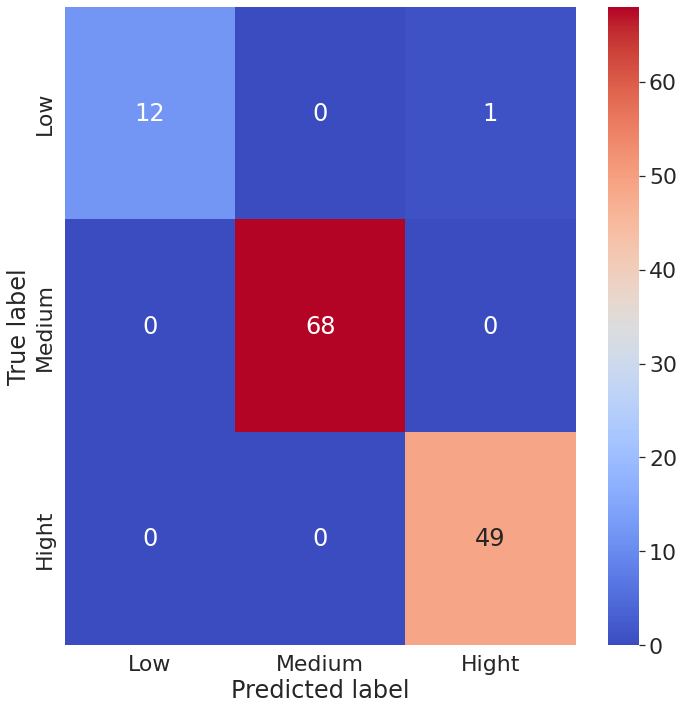

In [ ]:
algorithm = gs.best_params_['classifier']
algorithm.fit(P_train, Q_train)
val_pred = algorithm.predict(P_val)

vis_eval(Q_val, val_pred)